In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("Advertising.csv")
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

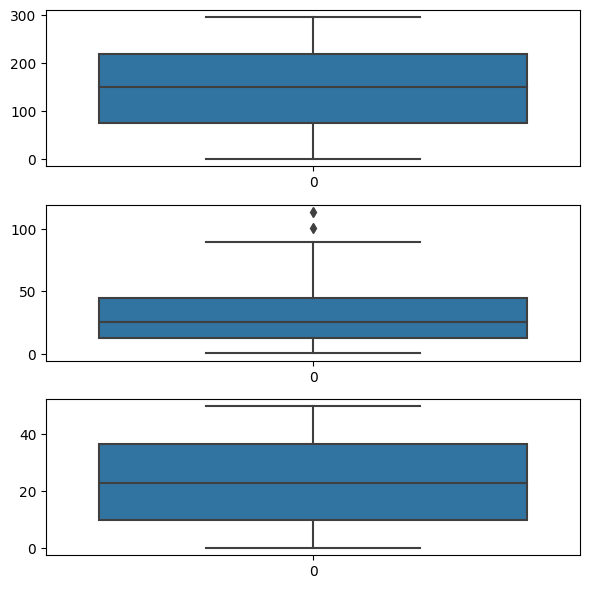

In [ ]:
fig, axs = plt.subplots(3, figsize = (6,6))
plt1 = sns.boxplot(df['TV'], ax =axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax =axs[1])
plt3 = sns.boxplot(df['Radio'], ax =axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

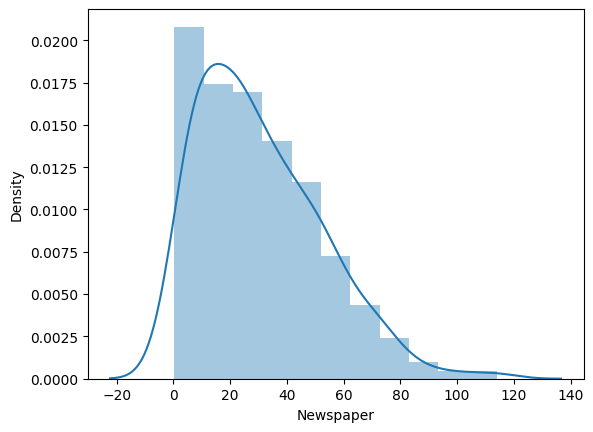

In [ ]:
sns.distplot(df['Newspaper'])

In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) +(iqr*1.5)
print(lower_bridge)
print(upper_bridge)


-35.775000000000006
93.625


In [ ]:
data = df.copy()

In [ ]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: >

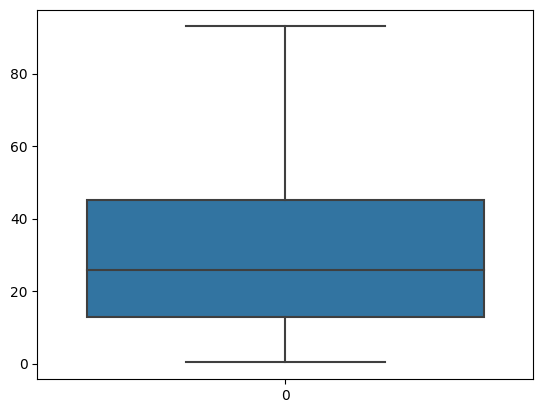

In [ ]:
sns.boxplot(data['Newspaper'])

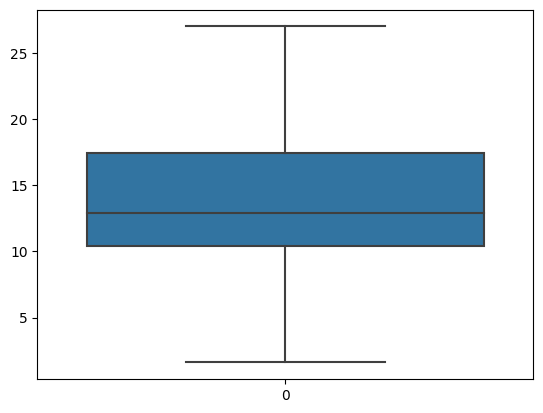

In [ ]:
sns.boxplot(data['Sales']);

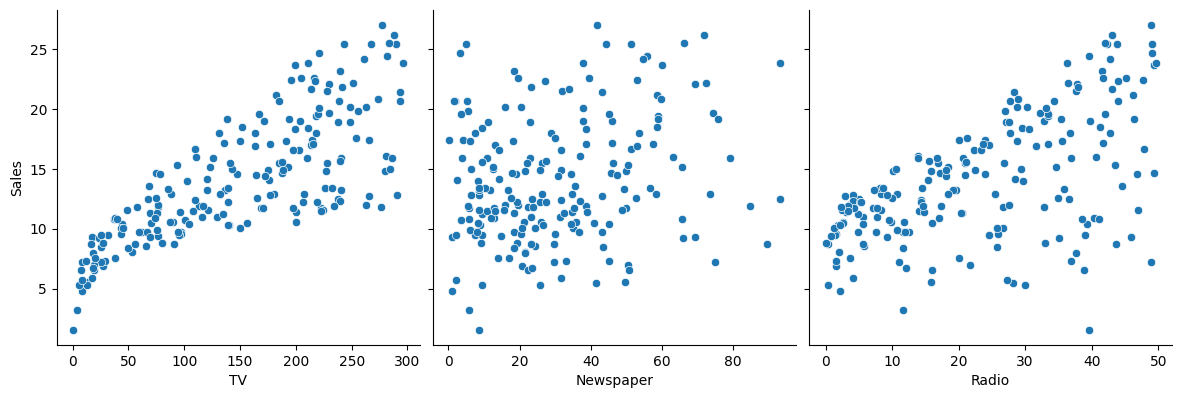

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

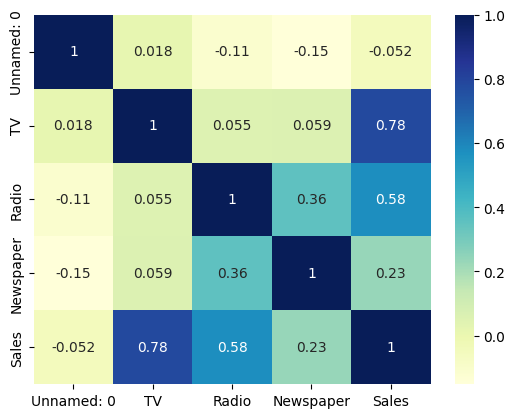

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [ ]:
print(important_features)

['TV', 'Radio', 'Sales']


In [ ]:
X = data['TV']
y = data['Sales']

In [ ]:
X = X.values.reshape(-1,1)


In [ ]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y


0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(X.shape,y.shape)

(200, 1) (200,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [ ]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [ ]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(X_train)


In [ ]:
knn_test_pred = knn.predict(X_test)

In [ ]:
print(knn_train_pred,knn_test_pred)

[ 7.96 20.34 14.4  10.36 11.32 19.72 20.94 11.46 16.02 19.06 15.9  13.86
 16.   16.4  16.02 10.92 12.32 15.36 21.3  11.2  21.16 21.06 10.34 16.88
  6.04 14.02 10.92 10.34 13.58 15.28 16.42 15.42 15.58 21.16 15.48 17.62
 15.36 11.8  13.72 10.2  21.06 13.46  9.38 11.32 11.42 19.06 20.7   9.72
 10.66  7.24 11.86 13.04 21.3   9.34 11.42  7.24 19.36 13.46 16.94 13.46
 16.02 19.46 10.66 20.14 17.16 15.58 11.42 10.12 16.48 16.56 15.36  6.56
  7.76 11.72 13.46  7.24 13.72  7.76 15.7  14.02 17.18 11.22 16.44  7.76
 10.9  20.34 10.2  16.88 13.72 13.72 14.52 16.   13.72 16.96 16.02 16.88
 11.22 10.28 21.3  11.6  17.16  6.24 15.84 20.34 10.28 15.2  11.8  10.28
 11.42  4.3  17.16 11.22  4.3  12.48 14.26  9.34  7.76 15.72 10.36  6.24
 12.32  9.72 11.4  21.26 11.22  5.42 16.02 16.4  13.04 11.62  6.56 19.36
  5.42 16.04] [14.68 11.32  8.58  7.96 20.94 20.94 19.66  7.76  7.24 15.   11.4  19.28
 20.14 11.86 17.16 15.58 20.7  13.86 19.72 21.3  16.48 19.28 11.42 15.7
 10.34 11.86 19.46 21.26 16.96 17.18 1

In [ ]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Varince"])

In [ ]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbours","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)


R2: 0.5406832710799108
RMSE: 3.5379989208076874


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Varince,variance
0,K-Nearest Neighbours,0.677279,0.540683,3.537999,NaN,0.136596


In [ ]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [ ]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [ ]:
print(svr_train_pred,svr_test_pred)

[ 7.75086197 16.98614378 14.12513562  8.99854756 11.53309962 16.8473635
 17.05037392 10.53843006 15.18767442 16.78893887 16.44832453 12.94330642
 16.04120925 16.63031248 15.18767442 11.45924223 13.78939605 17.2874053
 16.53507716 11.72230992 17.34873688 17.52052006  8.7279884  17.48675713
  7.51546122 12.52981534 11.47161261  8.59048827 12.71922454 16.74173047
 14.65018259 17.38505478 15.08746104 17.32352877 17.42347553 17.1079566
 17.30508073 11.8880362  16.32795279  8.92216677 17.52012519 13.23760607
  9.82601547 11.5534659  10.64046807 16.73236646 17.42044068  9.30102488
 10.31879726  7.69538589 12.09083855 12.49799669 16.50799509  9.64164558
 10.68363561  7.68460547 16.88311288 13.30004901 14.88684933 13.30902293
 17.47032248 17.50945052 10.32894709 16.95267534 17.08478764 15.11912549
 10.63082928  9.20730622 15.6000489  15.91371644 17.25487668  7.55759562
  8.09136767 10.60181275 13.16265414  7.69538589 16.29604228  8.12365714
 14.53008951 12.61388628 16.78385697 11.17571664 15.48

In [ ]:
r2 = r2_score(y_test, svr_test_pred)
r2_train = r2_score(y_train, svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test, svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model": "Support Vector Machine", "Train R2":r2_train, "Test R2":r2, "Test RMSE":rmse, "Variance": variance},ignore_index=True)
print("R2:",r2)
print("RMSE:", rmse)

R2: 0.5569315091920798
RMSE: 3.4748574844095153


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Varince,variance,Variance
0,K-Nearest Neighbours,0.677279,0.540683,3.537999,NaN,0.136596,NaN
1,Support Vector Machine,0.574453,0.556932,3.474857,NaN,NaN,0.017521


In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_constant = sm.add_constant(X_train)

In [ ]:
model = sm.OLS(y_train, X_train_constant).fit()

In [ ]:
model.params

const    6.998476
x1       0.046675
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     202.6
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           1.92e-28
Time:                        11:08:19   Log-Likelihood:                -347.84
No. Observations:                 134   AIC:                             699.7
Df Residuals:                     132   BIC:                             705.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9985      0.549     12.753      0.0

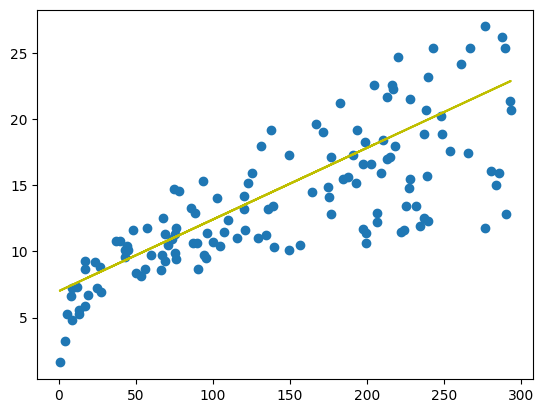

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

189   -1.171300
52     5.501032
180   -3.807797
1      1.324482
34    -1.965283
         ...   
107   -2.517905
22    -2.014587
84     4.736390
126   -0.762542
185    6.033128
Name: Sales, Length: 134, dtype: float64

In [ ]:
y_train_pred

array([ 7.87130018, 17.09896817, 14.30779697,  9.07551786, 11.46528316,
       20.2682077 , 17.19231837, 10.42442835, 15.25996908, 20.34755538,
       16.45018423, 13.11758183, 16.03944332, 16.65088717, 15.25996908,
       11.38126798, 13.99040627, 17.60305929, 20.66961359, 11.68465615,
       19.39538326, 18.59257148,  8.84214234, 18.1958331 ,  7.54457446,
       12.64616328, 11.39527051,  8.72078707, 12.86553627, 16.78157746,
       14.78388303, 17.83176729, 15.17128639, 19.4560609 , 17.94378754,
       17.28100107, 17.64039937, 11.88069158, 16.32416145,  9.01017271,
       18.61124152, 13.43497253,  9.78031192, 11.48862071, 10.52244607,
       20.42223554, 19.19468032,  9.33223093, 10.2190579 ,  7.80128753,
       12.12340212, 12.6088232 , 20.70228617,  9.62161657, 10.56445366,
        7.787285  , 16.95894286, 13.50031768, 14.99392099, 13.5096527 ,
       18.11648543, 18.34986094, 10.22839292, 17.05229306, 19.91347691,
       15.19929145, 10.51311105,  9.25288325, 15.6287024 , 15.91

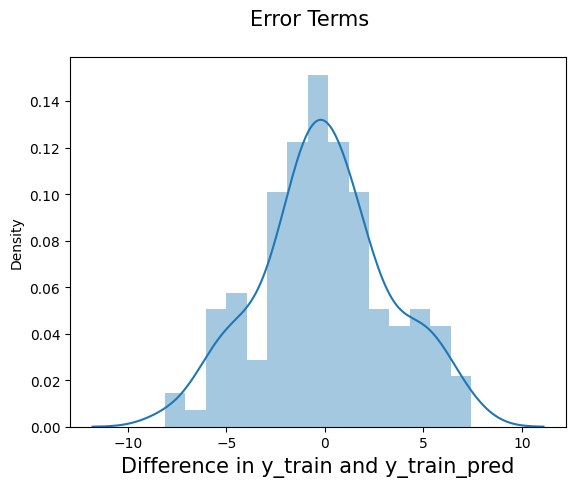

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

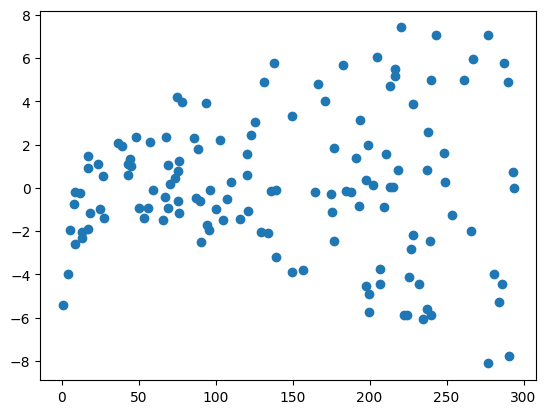

In [ ]:
plt.scatter(X_train, res)
plt.show()

In [ ]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [ ]:
y_pred

array([13.66834805, 11.53529582,  8.46874151,  7.90397276, 17.19698588,
       17.1596458 , 18.91929721,  8.1933584 ,  7.8339601 , 13.30894975,
       10.74181906, 19.37671322, 17.01962049, 12.12340212, 20.1328499 ,
       15.04993112, 19.26002546, 13.14558689, 20.23553513, 20.83297646,
       15.6287024 , 19.26936048, 10.50377603, 14.62985519,  8.77212968,
       12.16540972, 18.27984829, 18.70925924, 15.76872771, 16.83758759,
       20.07683978, 16.52486439, 12.46879789, 17.25766352, 10.55978615,
       10.19105283, 17.37901879,  8.7814647 ,  8.17002085, 14.06975394,
       19.7734516 , 14.85856319, 11.54929835, 15.79206527, 14.62052017,
       12.26809494, 18.20516812,  7.339204  , 15.43733448, 13.54699278,
        8.33338371, 13.59366789,  7.39054662, 13.87371851, 14.94257838,
        9.9063347 , 17.29033609, 14.7278729 ,  7.87596769, 16.28215385,
       17.71041202, 16.11879099,  7.91330778, 18.20516812, 13.49565017,
       17.73841709])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.253042000400949

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.6116921125617659

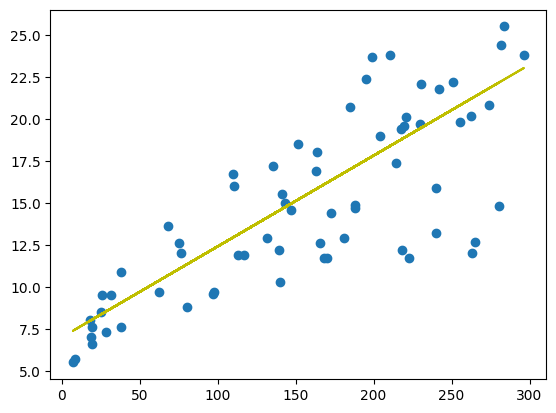

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()